<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# HOUSE PRICE PREDICTION

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Introduction to Linear Regression](#section4)<br>
    - 4.1 [Linear Regression Equation with Errors in consideration](#section401)<br>
        - 4.1.1 [Assumptions of Linear Regression](#sectionassumptions)<br>
    - 4.2 [Preparing X and y using pandas](#section402)<br>
    - 4.3 [Splitting X and y into training and test datasets](#section403)<br>
    - 4.4 [Linear regression in scikit-learn](#section404)<br>
    - 4.5 [Interpreting Model Coefficients](#section405)<br>
    - 4.6 [Using the Model for Prediction](#section406)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model evaluation using metrics](#section501)<br>
    - 5.2 [Model Evaluation using Rsquared value.](#section502)<br>
6. [Feature Selection](#section6)<br>
7. [Conclusion](#section7)
  - 7.1 [Actionable Insights](#section701)

<a id=section1></a>

## 1. Problem Statement

__SalePrice__ predict of a house by its features. If a seller want to sell his/her house but don’t know the exact price of the house, so using machine learning algorithms can help you to predict the price of the house just providing features of the target house.
- We want to find a function that given input for house features __predicts the price of house__.
- Visualize the __relationship__ between the _features_ and the _response_ using scatter plots.
- Which features __contribute__ to sales?



<a id=section2></a>

## 2. Data Loading and Description

The house prices dataset captures all the features and the saleprice.

- SalePrice: - the property's sale price in INR/Dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits

   .    .
   .    .
   
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

__Importing Packages__

In [23]:
import numpy as np                     
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

#### Importing the Dataset

In [24]:
# Importing the dataset (House prices for Sell house).

Project2= pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv')
Project = Project2.copy()
Project.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


What are the **features**?
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits

   .    .
   .    .
   
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

What is the **response**?

- SalePrice: The property's sale price in INR/Dollars. 

<a id=section3></a>

## 3. Exploratory Data Analysis

In [25]:
# Print all cell's output and not just the last one

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [26]:
Project.shape

(1460, 81)

In [27]:
Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

- ```info``` function gives us the following insights into the dataframe:

  - There are a total of **1460 samples (rows)** and **81 columns** in the dataframe.
  
  - There are **35 columns** with **numeric** datatype.
  - There are **43 columns** with **Object** datatype.
  - There are **3 columns** with **float** datatype.
  - There are **some many missing** values in the dataset.

In [28]:
Project.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000



- ```Describe``` function gives us the following insights into the data:
   - There are 1460 **observations** in the dataset.
  
   - As we can see here, mean value is equal to the median value of each column.
  
  - Similarly comparing the **75%** and **max** values of the other columns we can see that there are **outliers** present in some other columns.
  
   

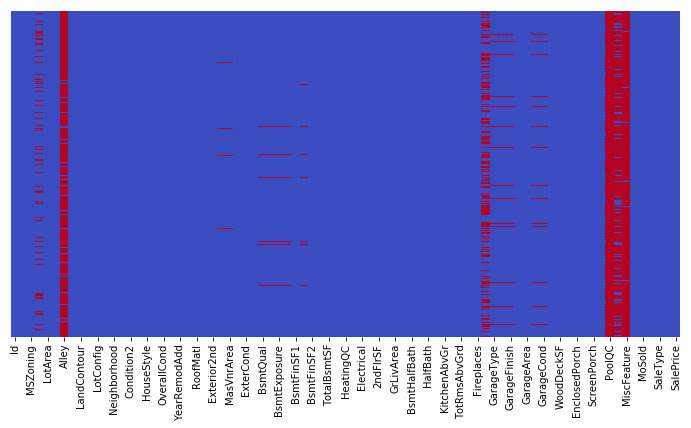

In [29]:
## Checking missing value in the dataset


plt.figure(figsize=(12,6))
sns.heatmap(Project.isnull(),yticklabels=False,cbar=False, cmap='coolwarm')
plt.show()

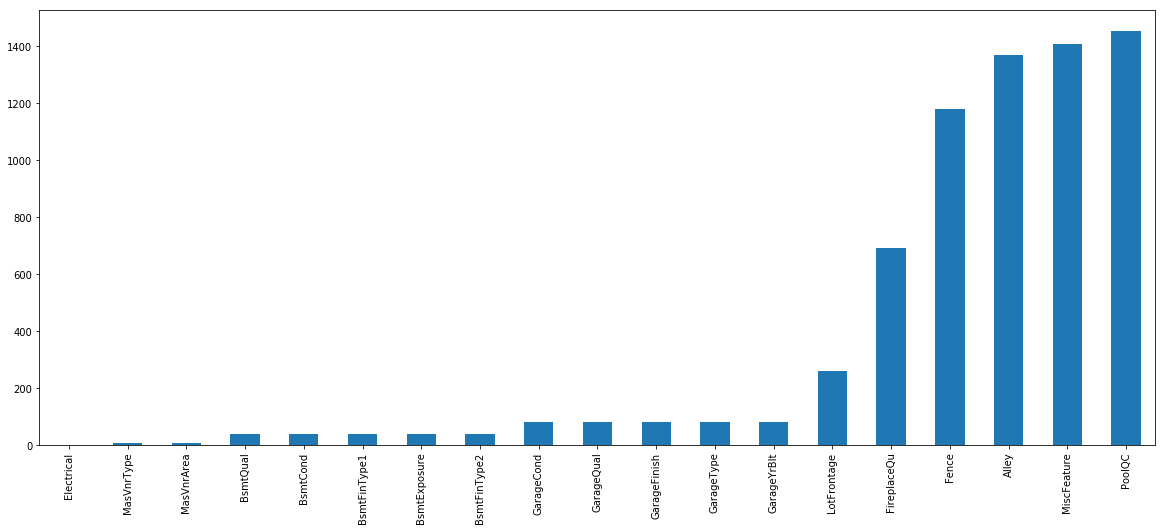

In [30]:
#missing values

plt.figure(figsize=(20,8))
missing = Project.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

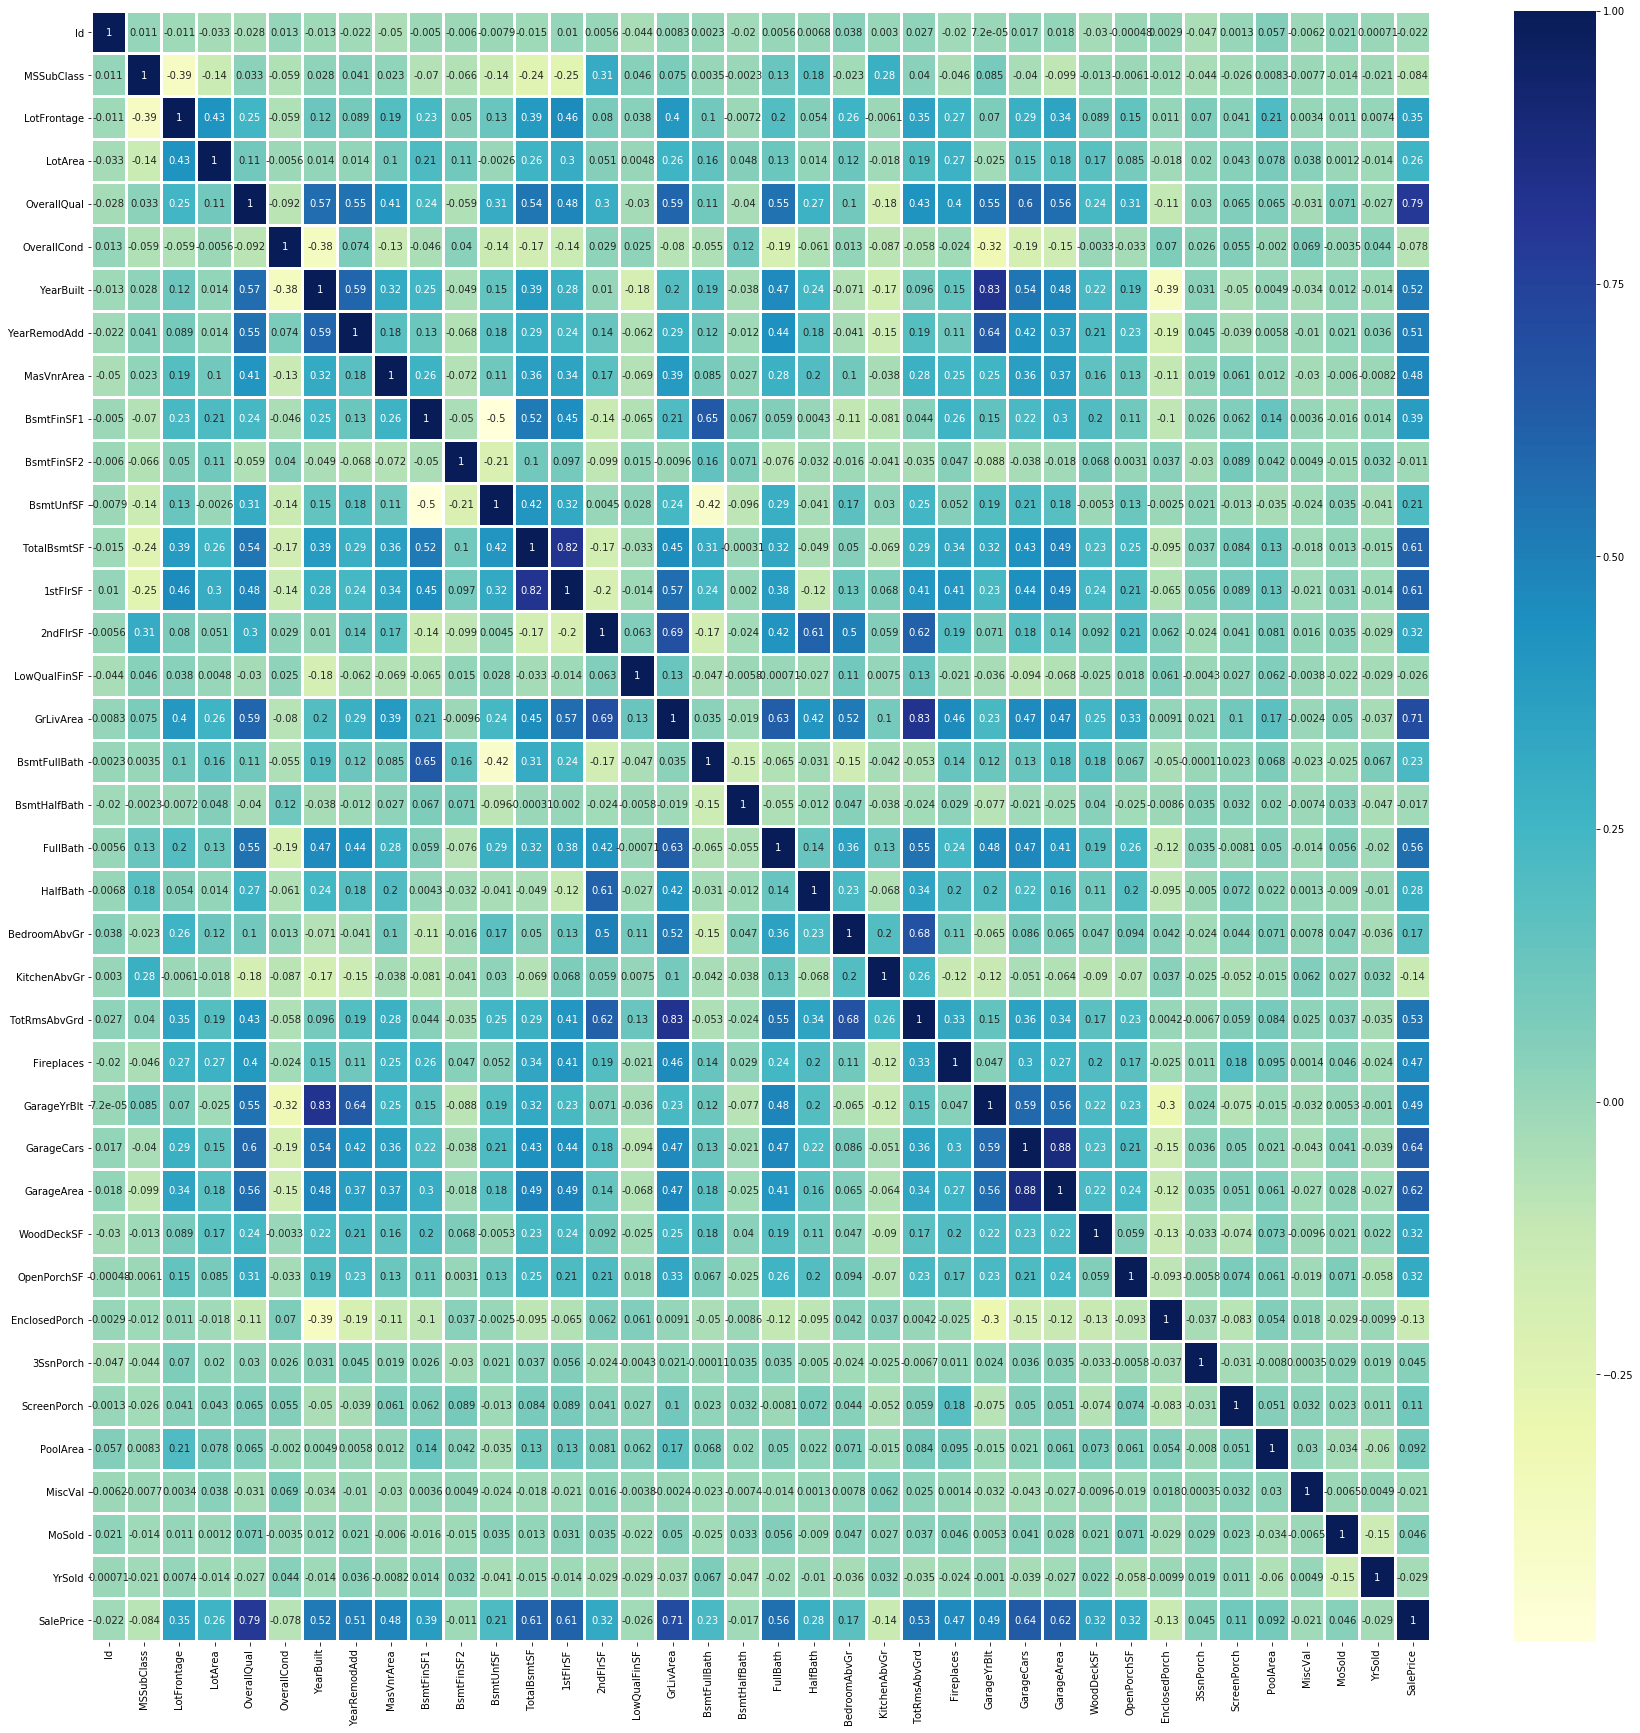

In [31]:
## Correlation heatmap

plt.figure(figsize=(30,30))
ax =sns.heatmap(Project.corr(),cmap = "YlGnBu", annot =True, linewidth=2)
plt.show()

Skewness: 1.882876
Kurtosis: 6.536282


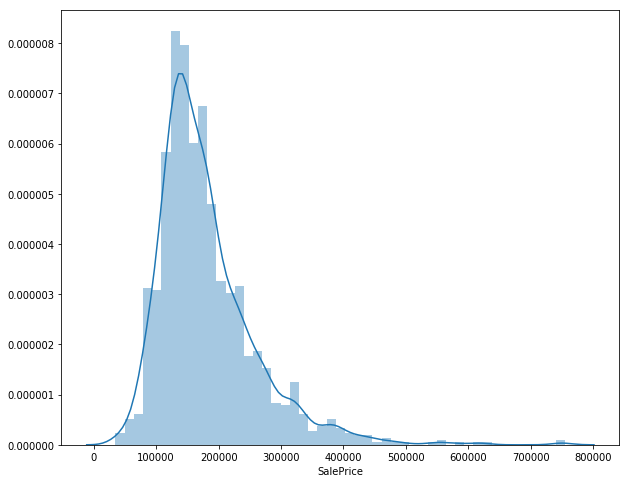

In [32]:
## The target variable : Distribution of SalePrice

plt.figure(figsize=(10,8))
sns.distplot(Project['SalePrice']);

#skewness and kurtosis

print("Skewness: %f" % Project['SalePrice'].skew())
print("Kurtosis: %f" % Project['SalePrice'].kurt())
plt.show()

Skewness: 1.882876
Kurtosis: 6.536282


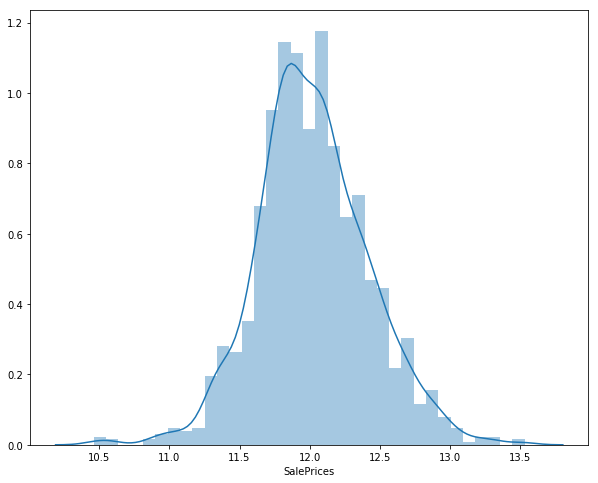

In [33]:
plt.figure(figsize=(10,8))
Project['SalePrices'] = np.log(Project['SalePrice'])
sns.distplot(Project['SalePrices']);

# skewness and kurtosis
print("Skewness: %f" % Project['SalePrice'].skew())
print("Kurtosis: %f" % Project['SalePrice'].kurt())
# dropping old column
Project.drop('SalePrice', axis= 1, inplace=True)   ## Putting inplace=False 
plt.show()

### Numerical and Categorical features

In [34]:
## Counts.

numerical_feats = Project.dtypes[Project.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = Project.dtypes[Project.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  43


In [35]:
## Columns name:

print(Project[numerical_feats].columns)
print("***"*123)
print(Project[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrices'],
      dtype='object')
*********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
Index(['MSZoning', 'Street', 'A

In [36]:
# Check the numberical:

Project[numerical_feats].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrices
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247694
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109011
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317167
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849398
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429216


In [37]:
# Check the categorical:

Project[categorical_feats].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [38]:
## Missing value percent:

total = Project.isnull().sum().sort_values(ascending=False)
percent = (Project.isnull().sum()/Project.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(23)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


### Filling missing values

- For a few columns there is lots of NaN entries.
- However, reading the data description we find this is not missing data:
- For PoolQC, NaN is not missing data but means no pool, likewise for Fence, FireplaceQu etc.

In [39]:
# columns where NaN values have meaning e.g. no pool etc.
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']


# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    Project[col].fillna('None',inplace=True)
    Project[col].fillna('None',inplace=True)

In [40]:
## Missing value percent:

total = Project.isnull().sum().sort_values(ascending=False)
percent = (Project.isnull().sum()/Project.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
SalePrices,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000


In [41]:
# fillna with mean for the remaining columns: LotFrontage, GarageYrBlt, MasVnrArea

Project.fillna(Project.mean(), inplace=True)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrices
0,1,60,RL,65.000000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.000000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.000000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.000000,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.000000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,12.429216
5,6,50,RL,85.000000,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,11.870600
6,7,20,RL,75.000000,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,12.634603
7,8,60,RL,70.049958,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,12.206073
8,9,50,RM,51.000000,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,11.774520
9,10,190,RL,50.000000,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,11.678440


In [42]:
total = Project.isnull().sum().sort_values(ascending=False)
percent = (Project.isnull().sum()/Project.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
SalePrices,0,0.0
Heating,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0


In [43]:
## Missing values in dataset:

Project.isnull().sum().sum()

0

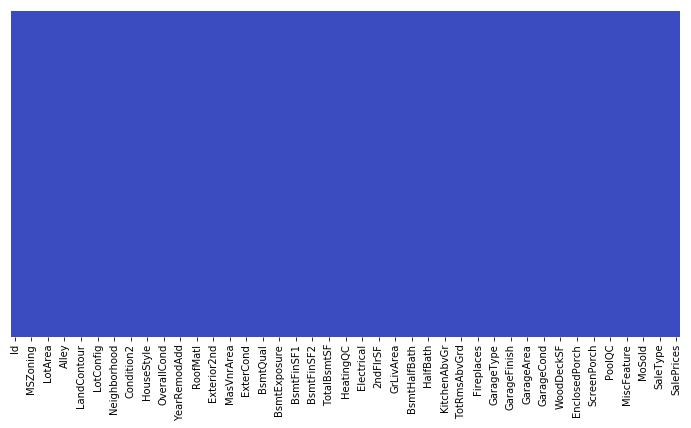

In [44]:
## Checking missing value in the dataset

plt.figure(figsize=(12,6))
sns.heatmap(Project.isnull(),yticklabels=False,cbar=False, cmap='coolwarm')
plt.show()

## Log transform
- Like the target variable, some of the feature values are not normally distributed and it is therefore better to use log values in dataset. Checking for skewness and kurtosis:


In [45]:
for col in numerical_feats:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(Project[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(Project[col].kurt())  
         )

Id              Skewness: 00.00     Kurtosis: -01.20
MSSubClass      Skewness: 01.41     Kurtosis: 001.58
LotFrontage     Skewness: 02.38     Kurtosis: 021.85
LotArea         Skewness: 12.21     Kurtosis: 203.24
OverallQual     Skewness: 00.22     Kurtosis: 000.10
OverallCond     Skewness: 00.69     Kurtosis: 001.11
YearBuilt       Skewness: -0.61     Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50     Kurtosis: -01.27
MasVnrArea      Skewness: 02.68     Kurtosis: 010.15
BsmtFinSF1      Skewness: 01.69     Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.26     Kurtosis: 020.11
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52     Kurtosis: 013.25
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01     Kurtosis: 083.23
GrLivArea       Skewness: 01.37     Kurtosis: 004.90
BsmtFullBath    Skewness: 00.60     Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10     Kurtosis: 

Skewness: 1.366560
Kurtosis: 4.895121


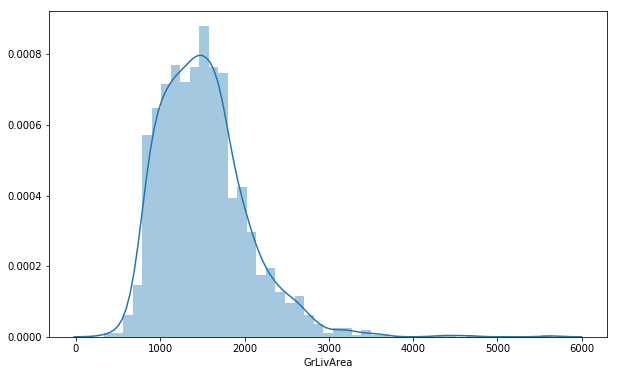

In [46]:
plt.figure(figsize=(10,6))
sns.distplot(Project['GrLivArea']);


#skewness and kurtosis
print("Skewness: %f" % Project['GrLivArea'].skew())
print("Kurtosis: %f" % Project['GrLivArea'].kurt())
plt.show()

Skewness: 12.207688
Kurtosis: 203.243271


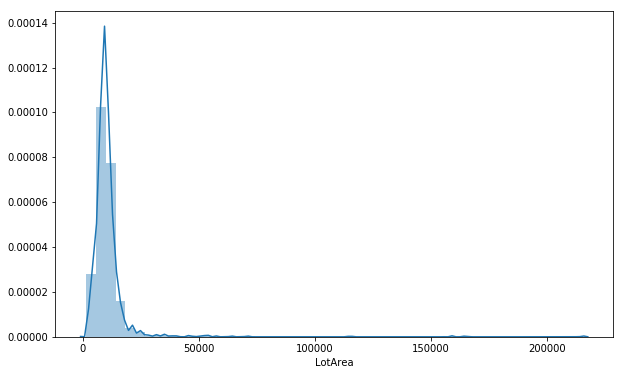

In [47]:
plt.figure(figsize=(10,6))
sns.distplot(Project['LotArea']);
#skewness and kurtosis


print("Skewness: %f" % Project['LotArea'].skew())
print("Kurtosis: %f" % Project['LotArea'].kurt())
plt.show()

In [48]:
for df in [Project]:
    df['GrLivArea_Log'] = np.log(df['GrLivArea'])
    df.drop('GrLivArea', inplace= True, axis = 1)
    df['LotArea_Log'] = np.log(df['LotArea'])
    df.drop('LotArea', inplace= True, axis = 1)
    
    
numerical_feats = Project.dtypes[Project.dtypes != "object"].index

Skewness: -0.006995
Kurtosis: 0.282603


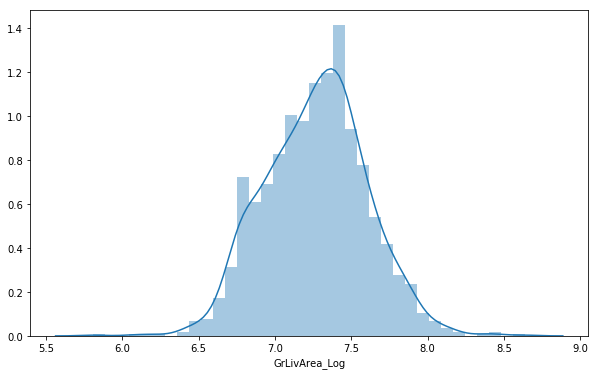

In [49]:
plt.figure(figsize=(10,6))
sns.distplot(Project['GrLivArea_Log']);
#skewness and kurtosis


print("Skewness: %f" % Project['GrLivArea_Log'].skew())
print("Kurtosis: %f" % Project['GrLivArea_Log'].kurt())
plt.show()

Skewness: -0.137994
Kurtosis: 4.713358


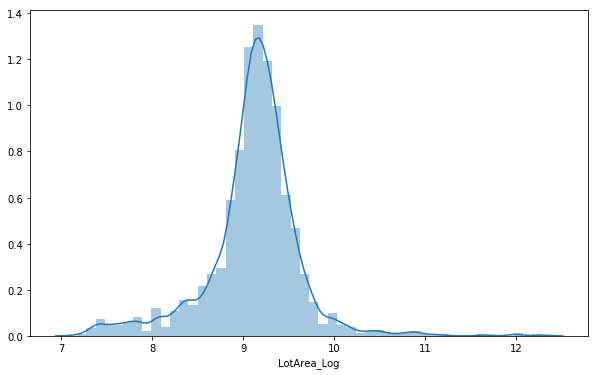

In [50]:
plt.figure(figsize=(10,6))
sns.distplot(Project['LotArea_Log']);
#skewness and kurtosis


print("Skewness: %f" % Project['LotArea_Log'].skew())
print("Kurtosis: %f" % Project['LotArea_Log'].kurt())
plt.show()

## Relation of features to target (SalePrices)

- Plots of relation to target for all numerical features

In [51]:
# switch for using log values for SalePrice and features     
use_logvals = 1  


# target used for correlation 
### target = 'SalePrices'

Text(0.5,1,'r = -0.07      p = 0.00')

Text(0.5,1,'r = 0.34      p = 0.00')

Text(0.5,1,'r = 0.82      p = 0.00')

Text(0.5,1,'r = -0.04      p = 0.16')

Text(0.5,1,'r = 0.59      p = 0.00')

Text(0.5,1,'r = 0.57      p = 0.00')

Text(0.5,1,'r = 0.43      p = 0.00')

Text(0.5,1,'r = 0.37      p = 0.00')

Text(0.5,1,'r = 0.00      p = 0.85')

Text(0.5,1,'r = 0.22      p = 0.00')

Text(0.5,1,'r = 0.61      p = 0.00')

Text(0.5,1,'r = 0.60      p = 0.00')

Text(0.5,1,'r = 0.32      p = 0.00')

Text(0.5,1,'r = -0.04      p = 0.15')

Text(0.5,1,'r = 0.24      p = 0.00')

Text(0.5,1,'r = -0.01      p = 0.84')

Text(0.5,1,'r = 0.59      p = 0.00')

Text(0.5,1,'r = 0.31      p = 0.00')

Text(0.5,1,'r = 0.21      p = 0.00')

Text(0.5,1,'r = -0.15      p = 0.00')

Text(0.5,1,'r = 0.53      p = 0.00')

Text(0.5,1,'r = 0.49      p = 0.00')

Text(0.5,1,'r = 0.50      p = 0.00')

Text(0.5,1,'r = 0.68      p = 0.00')

Text(0.5,1,'r = 0.65      p = 0.00')

Text(0.5,1,'r = 0.33      p = 0.00')

Text(0.5,1,'r = 0.32      p = 0.00')

Text(0.5,1,'r = -0.15      p = 0.00')

Text(0.5,1,'r = 0.05      p = 0.04')

Text(0.5,1,'r = 0.12      p = 0.00')

Text(0.5,1,'r = 0.07      p = 0.01')

Text(0.5,1,'r = -0.02      p = 0.44')

Text(0.5,1,'r = 0.06      p = 0.03')

Text(0.5,1,'r = -0.04      p = 0.15')

Text(0.5,1,'r = 0.73      p = 0.00')

Text(0.5,1,'r = 0.40      p = 0.00')

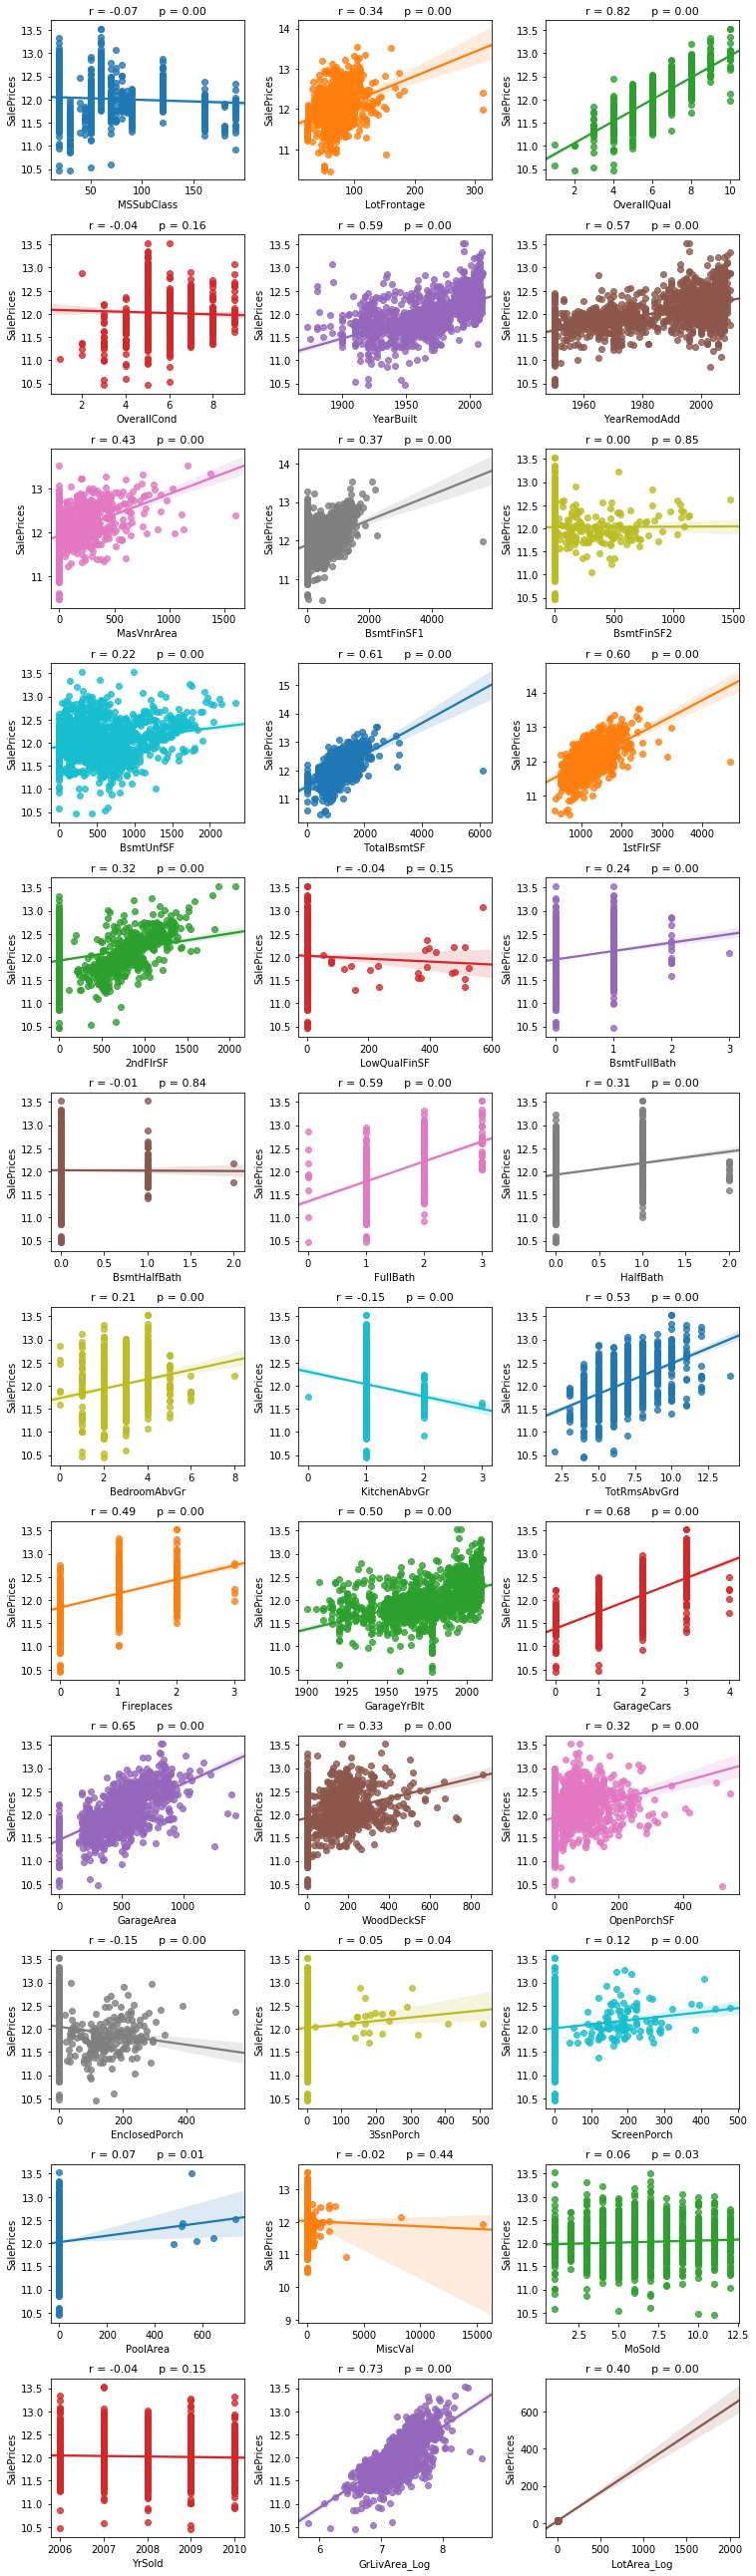

In [52]:
from scipy import stats

# target used for correlation 
target = 'SalePrices'

nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ['Id', 'SalePrice', 'SalePrices']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(Project[li_plot_num_feats[i]], Project[target], ax = axs[r][c])
            stp = stats.pearsonr(Project[li_plot_num_feats[i]], Project[target])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()

In [53]:
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()


We see that for some features like 'OverallQual' there is a strong linear correlation (0.79) to the target.
For other features like 'MSSubClass' the correlation is very weak.
For this kernel I decided to use only those features for prediction that have a correlation larger than a threshold value to SalePrice.
This threshold value can be choosen in the global settings : min_val_corr

With the default threshold for min_val_corr = 0.4, these features are dropped in Part 2, Data Wrangling:
'Id', 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'

We also see that the entries for some of the numerical columns are in fact categorical values.
For example, the numbers for 'OverallQual' and 'MSSubClass' represent a certain group for that feature.


In [54]:
##Outliers


Project = Project.drop(
    Project[(Project['OverallQual']==10) & (Project['SalePrices']<12.3)].index)

In [55]:
Project = Project.drop(
    Project[(Project['GrLivArea_Log']>8.3) & (Project['SalePrices']<12.5)].index)

# Find columns with strong correlation to target

In [56]:
# only columns with correlation above this threshold value  

min_val_corr = 0.4 

corr = Project.corr()
corr_abs = corr.abs()

nr_num_cols = len(numerical_feats)
ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)

- List of numerical features and their correlation coefficient to target

In [57]:
print(ser_corr)
print("*"*30)
print("List of numerical features with r above min_val_corr :")
print(cols_abv_corr_limit)
print("*"*30)
print("List of numerical features with r below min_val_corr :")
print(cols_bel_corr_limit)

SalePrices       1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
GarageCars       0.681033
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
LotArea_Log      0.402814
BsmtFinSF1       0.392283
LotFrontage      0.352432
WoodDeckSF       0.334250
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209036
EnclosedPorch    0.149029
KitchenAbvGr     0.147534
ScreenPorch      0.121245
PoolArea         0.074338
MSSubClass       0.073969
MoSold           0.057064
3SsnPorch        0.054914
LowQualFinSF     0.037951
YrSold           0.037151
OverallCond      0.036821
MiscVal          0.020012
Id               0.017774
BsmtHalfBath     0.005124
BsmtFinSF2       0.004863
Name: SalePr

- List of categorical features and their unique values

In [58]:
for catg in list(categorical_feats) :
    print(Project[catg].value_counts())
    print('#'*50)

RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
##################################################
Pave    1452
Grvl       6
Name: Street, dtype: int64
##################################################
None    1367
Grvl      50
Pave      41
Name: Alley, dtype: int64
##################################################
Reg    925
IR1    483
IR2     41
IR3      9
Name: LotShape, dtype: int64
##################################################
Lvl    1311
Bnk      61
HLS      50
Low      36
Name: LandContour, dtype: int64
##################################################
AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64
##################################################
Inside     1051
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
##################################################
Gtl    1380
Mod      65
Sev      13
Name: LandSlope, dtype: int64
###########################

- Relation to SalePrice for all categorical features

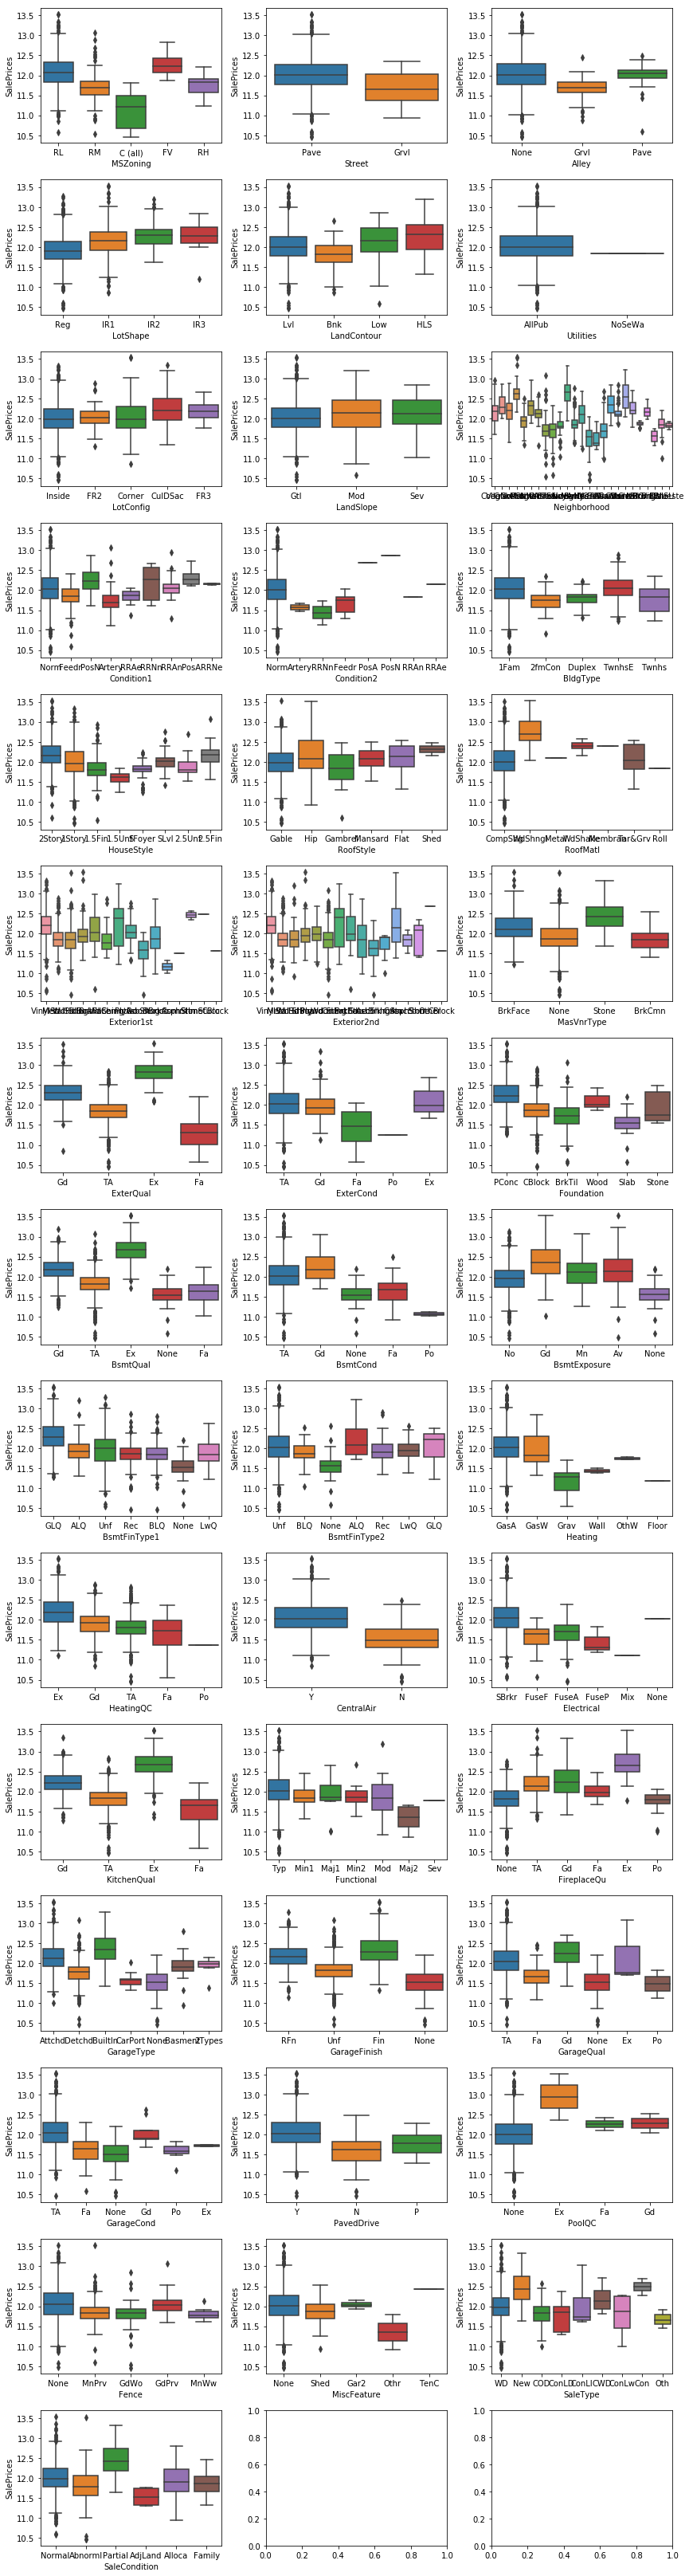

In [59]:
li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=target, data=Project, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()

In [60]:
catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

- Features with largest correlation to SalePrices

- All numerical features with correlation coefficient above threshold

In [61]:

nr_feats = len(cols_abv_corr_limit)

In [62]:
cols_abv_corr_limit

['SalePrices',
 'OverallQual',
 'GrLivArea_Log',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'Fireplaces',
 'MasVnrArea',
 'LotArea_Log']

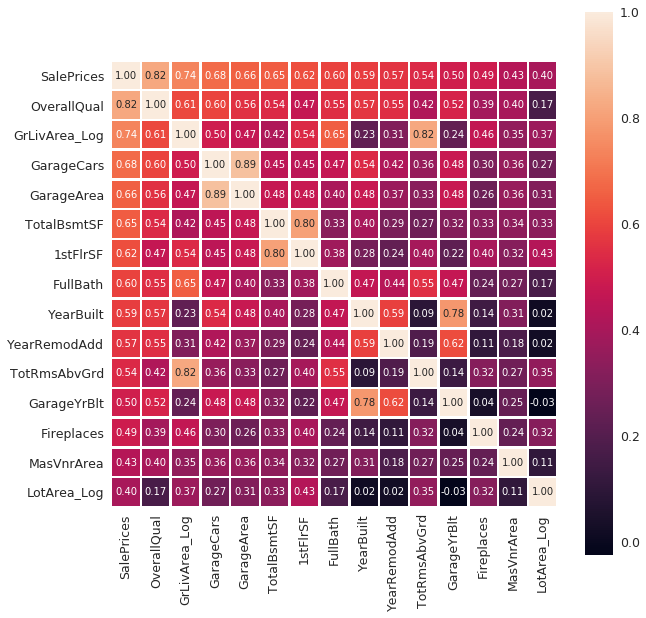

In [63]:
plt.figure(figsize=(20,15))

plot_corr_matrix(Project, nr_feats, target)

- Those features with the largest correlation to SalePrice, some also are correlated strongly to each other.
- Drop all columns with only small correlation to SalePrice
- Transform Categorical to numerical
- Handling columns with missing data
- Drop all columns with strong correlation to similar features
- Numerical columns : drop similar and low correlation
- Categorical columns : Transform to numerical
- Dropping all columns with weak correlation to SalePrice

In [64]:
# Dropping some columns

to_drop_num  = cols_bel_corr_limit
to_drop_catg = catg_weak_corr

cols_to_drop = ['Id'] + to_drop_num + to_drop_catg 

for df in [Project]:
    df.drop(cols_to_drop, inplace= False, axis = 1)

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,...,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SaleType,SalePrices,GrLivArea_Log,LotArea_Log
0,RL,CollgCr,Norm,7,2003,2003,BrkFace,196.0,Gd,Gd,...,Gd,8,0,2003.000000,2,548,WD,12.247694,7.444249,9.041922
1,RL,Veenker,Norm,6,1976,1976,None,0.0,TA,Gd,...,TA,6,1,1976.000000,2,460,WD,12.109011,7.140453,9.169518
2,RL,CollgCr,Norm,7,2001,2002,BrkFace,162.0,Gd,Gd,...,Gd,6,1,2001.000000,2,608,WD,12.317167,7.487734,9.328123
3,RL,Crawfor,Norm,7,1915,1970,None,0.0,TA,TA,...,Gd,7,1,1998.000000,3,642,WD,11.849398,7.448334,9.164296
4,RL,NoRidge,Norm,8,2000,2000,BrkFace,350.0,Gd,Gd,...,Gd,9,1,2000.000000,3,836,WD,12.429216,7.695303,9.565214
5,RL,Mitchel,Norm,5,1993,1995,None,0.0,TA,Gd,...,TA,5,0,1993.000000,2,480,WD,11.870600,7.216709,9.554993
6,RL,Somerst,Norm,8,2004,2005,Stone,186.0,Gd,Ex,...,Gd,7,1,2004.000000,2,636,WD,12.634603,7.434848,9.218705
7,RL,NWAmes,Norm,7,1973,1973,Stone,240.0,TA,Gd,...,TA,7,2,1973.000000,2,484,WD,12.206073,7.644919,9.247829
8,RM,OldTown,Norm,7,1931,1950,None,0.0,TA,TA,...,TA,8,2,1931.000000,2,468,WD,11.774520,7.480992,8.719317
9,RL,BrkSide,Artery,5,1939,1950,None,0.0,TA,TA,...,TA,5,2,1939.000000,1,205,WD,11.678440,6.981935,8.911934


# Convert categorical columns to numerical

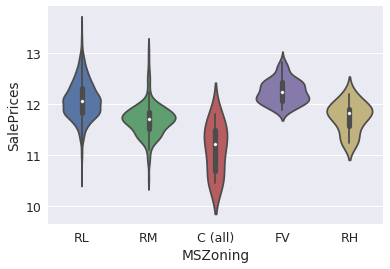

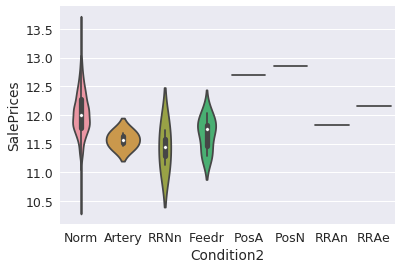

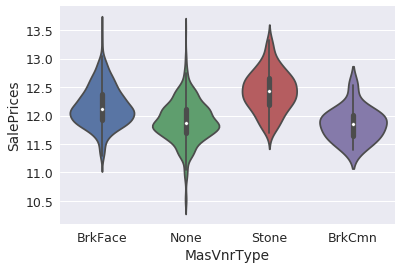

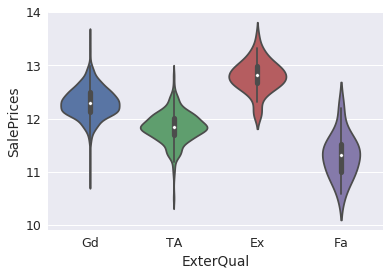

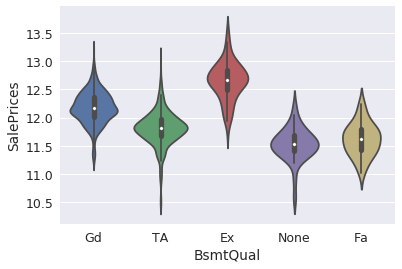

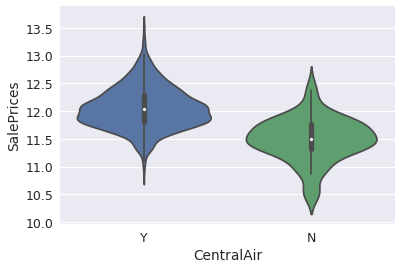

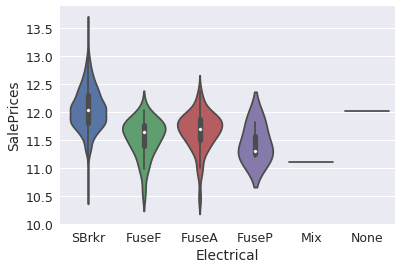

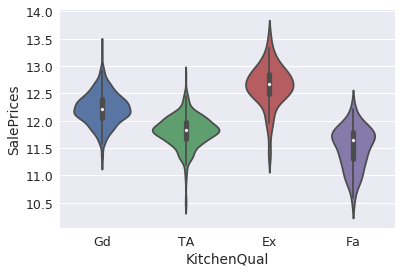

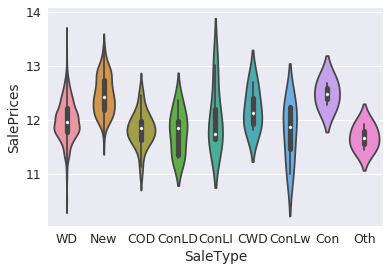

In [65]:
catg_list = catg_strong_corr.copy()
catg_list.remove('Neighborhood')

for catg in catg_list :
    #sns.catplot(x=catg, y=target, data=df_train, kind='boxen')
    sns.violinplot(x=catg, y=target, data=Project)
    plt.show()
    #sns.boxenplot(x=catg, y=target, data=df_train)
    #bp = df_train.boxplot(column=[target], by=catg)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

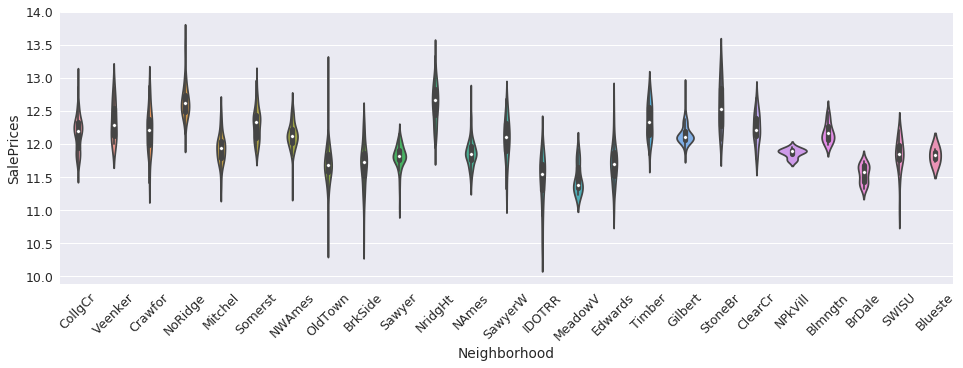

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.violinplot(x='Neighborhood', y=target, data=Project, ax=ax)
plt.xticks(rotation=45)
plt.show()

In [67]:
for catg in catg_list :
    g = Project.groupby(catg)[target].mean()
    print(g)


MSZoning
C (all)    11.118259
FV         12.246616
RH         11.749840
RL         12.085939
RM         11.692893
Name: SalePrices, dtype: float64
Condition2
Artery    11.570036
Feedr     11.670631
Norm      12.025925
PosA      12.691580
PosN      12.860999
RRAe      12.154779
RRAn      11.827043
RRNn      11.435329
Name: SalePrices, dtype: float64
MasVnrType
BrkCmn     11.853239
BrkFace    12.163630
None       11.896884
Stone      12.431016
Name: SalePrices, dtype: float64
ExterQual
Ex    12.792412
Fa    11.304541
Gd    12.311282
TA    11.837985
Name: SalePrices, dtype: float64
BsmtQual
Ex      12.650235
Fa      11.617600
Gd      12.179882
None    11.529680
TA      11.810855
Name: SalePrices, dtype: float64
CentralAir
N    11.491858
Y    12.061099
Name: SalePrices, dtype: float64
Electrical
FuseA    11.660315
FuseF    11.539624
FuseP    11.446808
Mix      11.112448
None     12.028739
SBrkr    12.061474
Name: SalePrices, dtype: float64
KitchenQual
Ex    12.645425
Fa    11.504581
Gd    

In [68]:
# 'MSZoning'
msz_catg2 = ['RM', 'RH']
msz_catg3 = ['RL', 'FV'] 


# Neighborhood
nbhd_catg2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nbhd_catg3 = ['NoRidge', 'NridgHt', 'StoneBr']

# Condition2
cond2_catg2 = ['Norm', 'RRAe']
cond2_catg3 = ['PosA', 'PosN'] 

# SaleType
SlTy_catg1 = ['Oth']
SlTy_catg3 = ['CWD']
SlTy_catg4 = ['New', 'Con']

In [69]:
for df in [Project]:
    
    df['MSZ_num'] = 1  
    df.loc[(df['MSZoning'].isin(msz_catg2) ), 'MSZ_num'] = 2    
    df.loc[(df['MSZoning'].isin(msz_catg3) ), 'MSZ_num'] = 3        
    
    df['NbHd_num'] = 1       
    df.loc[(df['Neighborhood'].isin(nbhd_catg2) ), 'NbHd_num'] = 2    
    df.loc[(df['Neighborhood'].isin(nbhd_catg3) ), 'NbHd_num'] = 3    

    df['Cond2_num'] = 1       
    df.loc[(df['Condition2'].isin(cond2_catg2) ), 'Cond2_num'] = 2    
    df.loc[(df['Condition2'].isin(cond2_catg3) ), 'Cond2_num'] = 3    
    
    df['Mas_num'] = 1       
    df.loc[(df['MasVnrType'] == 'Stone' ), 'Mas_num'] = 2 
    
    df['ExtQ_num'] = 1       
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2     
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3     
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4     
   
    df['BsQ_num'] = 1          
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2     
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3     
 
    df['CA_num'] = 0          
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1    

    df['Elc_num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 


    df['KiQ_num'] = 1       
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2     
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3     
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4      
    
    df['SlTy_num'] = 2       
    df.loc[(df['SaleType'].isin(SlTy_catg1) ), 'SlTy_num'] = 1  
    df.loc[(df['SaleType'].isin(SlTy_catg3) ), 'SlTy_num'] = 3  
    df.loc[(df['SaleType'].isin(SlTy_catg4) ), 'SlTy_num'] = 4  
  

- Checking correlation to SalePrice for the new numerical columns

Text(0.5,1,'r = 0.41      p = 0.00')

Text(0.5,1,'r = 0.70      p = 0.00')

Text(0.5,1,'r = 0.11      p = 0.00')

Text(0.5,1,'r = 0.31      p = 0.00')

Text(0.5,1,'r = 0.68      p = 0.00')

Text(0.5,1,'r = 0.66      p = 0.00')

Text(0.5,1,'r = 0.35      p = 0.00')

Text(0.5,1,'r = 0.30      p = 0.00')

Text(0.5,1,'r = 0.67      p = 0.00')

Text(0.5,1,'r = 0.34      p = 0.00')

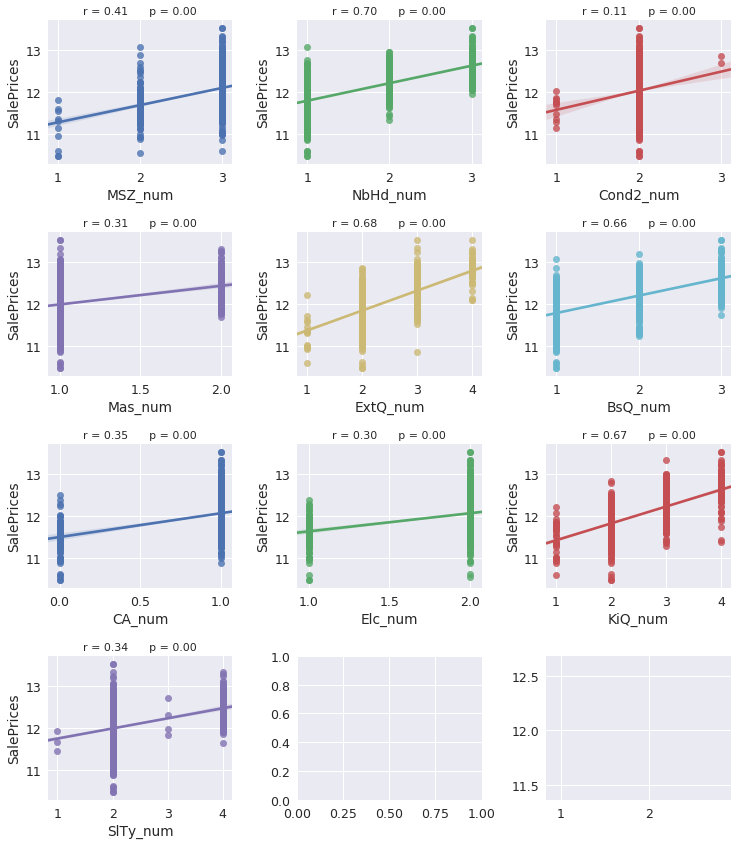

In [70]:
new_col_num = ['MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']

nr_rows = 4
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(new_col_num):
            sns.regplot(Project[new_col_num[i]], Project[target], ax = axs[r][c])
            stp = stats.pearsonr(Project[new_col_num[i]], Project[target])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

- There are few columns with quite large correlation to SalePrice (NbHd_num, ExtQ_num, BsQ_num, KiQ_num).
- Dropping the converted categorical columns and the new numerical columns with weak correlation

## Columns and correlation before dropping

In [71]:
catg_cols_to_drop = ['Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

corr1 = Project.corr()
corr_abs_1 = corr1.abs()

nr_all_cols = len(Project)
ser_corr_1 = corr_abs_1.nlargest(nr_all_cols, target)[target]

print(ser_corr_1)
cols_bel_corr_limit_1 = list(ser_corr_1[ser_corr_1.values <= min_val_corr].index)


for df in [Project] :
    df.drop(catg_cols_to_drop, inplace= True, axis = 1)
    df.drop(cols_bel_corr_limit_1, inplace= True, axis = 1)   

SalePrices       1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
NbHd_num         0.696962
ExtQ_num         0.682225
GarageCars       0.681033
KiQ_num          0.669989
BsQ_num          0.661286
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
MSZ_num          0.409423
LotArea_Log      0.402814
BsmtFinSF1       0.392283
LotFrontage      0.352432
CA_num           0.351598
SlTy_num         0.337469
WoodDeckSF       0.334250
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
Mas_num          0.313280
Elc_num          0.304857
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209036
EnclosedPorch    0.149029
KitchenAbvGr     0.147534
ScreenPorch      0.121245
Cond2_num        0.107610
PoolArea         0.074338
MSSubClass  

## Columns and correlation after dropping

In [72]:
corr2 = Project.corr()
corr_abs_2 = corr2.abs()

nr_all_cols = len(Project)
ser_corr_2 = corr_abs_2.nlargest(nr_all_cols, target)[target]

print(ser_corr_2)

SalePrices       1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
NbHd_num         0.696962
ExtQ_num         0.682225
GarageCars       0.681033
KiQ_num          0.669989
BsQ_num          0.661286
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
MSZ_num          0.409423
LotArea_Log      0.402814
Name: SalePrices, dtype: float64


In [73]:
# Rechecking

Project.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,BldgType,...,MiscFeature,SaleCondition,SalePrices,GrLivArea_Log,LotArea_Log,MSZ_num,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Norm,1Fam,...,None,Normal,12.247694,7.444249,9.041922,3,2,3,2,3
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Feedr,1Fam,...,None,Normal,12.109011,7.140453,9.169518,3,2,2,2,2
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Norm,1Fam,...,None,Normal,12.317167,7.487734,9.328123,3,2,3,2,3
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Norm,1Fam,...,None,Abnorml,11.849398,7.448334,9.164296,3,2,2,1,3
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,Norm,1Fam,...,None,Normal,12.429216,7.695303,9.565214,3,3,3,2,3


- List of all features with strong correlation to SalePrice_Log
- After dropping all coumns with weak correlation

In [74]:
corr = Project.corr()
corr_abs = corr.abs()

nr_all_cols = len(Project)
print (corr_abs.nlargest(nr_all_cols, target)[target])

SalePrices       1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
NbHd_num         0.696962
ExtQ_num         0.682225
GarageCars       0.681033
KiQ_num          0.669989
BsQ_num          0.661286
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
MSZ_num          0.409423
LotArea_Log      0.402814
Name: SalePrices, dtype: float64


## All features with strong correlation to SalePrice

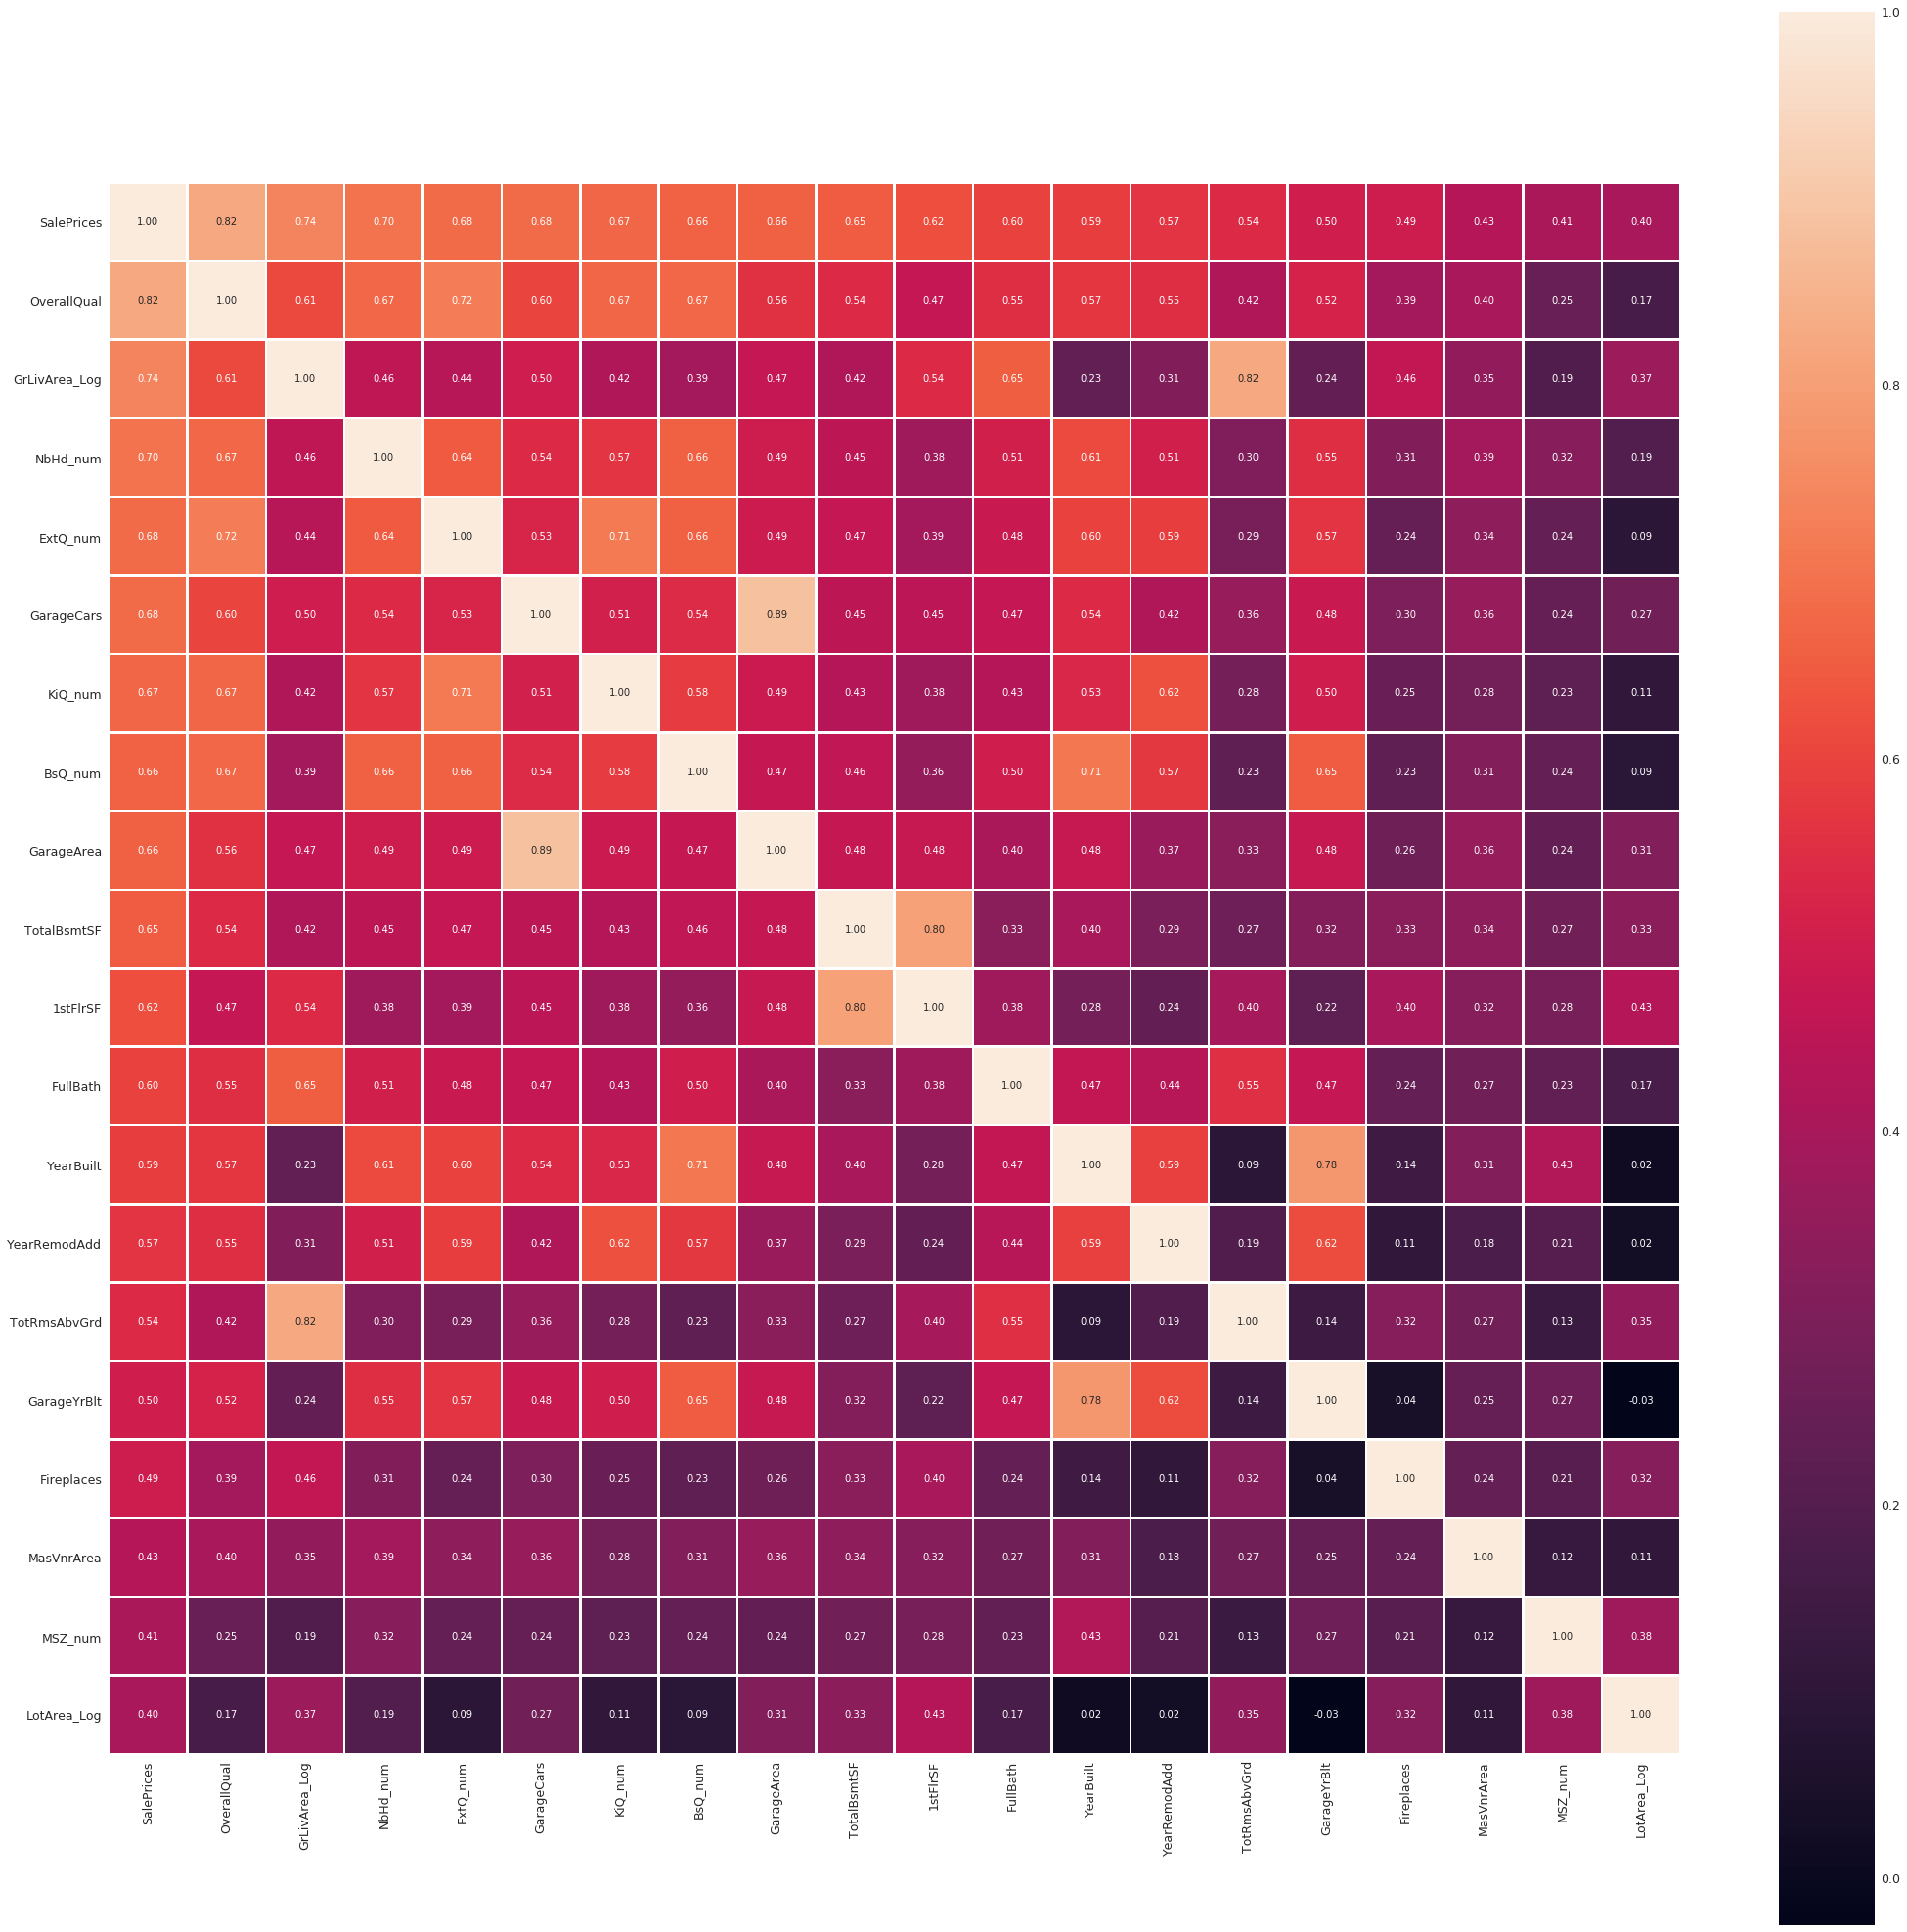

In [75]:
plt.figure(figsize=(8,10))
nr_feats=len(Project.columns)
plot_corr_matrix(Project, nr_feats, target)
plt.show()


- Strong correlation of these features to other, similar features:
- 'GrLivArea_Log' and 'TotRmsAbvGrd'
- 'GarageCars' and 'GarageArea'
- 'TotalBsmtSF' and '1stFlrSF'
- 'YearBuilt' and 'GarageYrBlt'
- Those features we drop the one that has smaller correlation coeffiecient to Target.

In [76]:
cols = corr_abs.nlargest(nr_all_cols, target)[target].index
cols = list(cols)

# switch for dropping columns that are similar to others already used and show a high correlation to these     
drop_similar = 1

if drop_similar == 1 :
    for col in ['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt'] :
        if col in cols: 
            cols.remove(col)

In [77]:
cols = list(cols)
print(cols)

['SalePrices', 'OverallQual', 'GrLivArea_Log', 'NbHd_num', 'ExtQ_num', 'GarageCars', 'KiQ_num', 'BsQ_num', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea', 'MSZ_num', 'LotArea_Log']


In [78]:
feats = cols.copy()
feats.remove('SalePrices')

print(feats)

['OverallQual', 'GrLivArea_Log', 'NbHd_num', 'ExtQ_num', 'GarageCars', 'KiQ_num', 'BsQ_num', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea', 'MSZ_num', 'LotArea_Log']


In [79]:
# Copy the Dataframe:

Project_final = Project[feats].copy()

y = Project[target]

In [80]:
"""
all_data = pd.concat(Project)

li_get_dummies = ['OverallQual', 'NbHd_num', 'GarageCars','ExtQ_num', 'KiQ_num',
                  'BsQ_num', 'FullBath', 'Fireplaces', 'MSZ_num']
all_data = pd.get_dummies(all_data, columns=li_get_dummies, drop_first=True)

Project_final = all_data[:Project.shape[0]]

"""

"\nall_data = pd.concat(Project)\n\nli_get_dummies = ['OverallQual', 'NbHd_num', 'GarageCars','ExtQ_num', 'KiQ_num',\n                  'BsQ_num', 'FullBath', 'Fireplaces', 'MSZ_num']\nall_data = pd.get_dummies(all_data, columns=li_get_dummies, drop_first=True)\n\nProject_final = all_data[:Project.shape[0]]\n\n"

## Rechecking shape and info

In [81]:
# Rechecking shape:

Project_final.shape

(1458, 15)

In [83]:
Project_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 15 columns):
OverallQual      1458 non-null int64
GrLivArea_Log    1458 non-null float64
NbHd_num         1458 non-null int64
ExtQ_num         1458 non-null int64
GarageCars       1458 non-null int64
KiQ_num          1458 non-null int64
BsQ_num          1458 non-null int64
TotalBsmtSF      1458 non-null int64
FullBath         1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
Fireplaces       1458 non-null int64
MasVnrArea       1458 non-null float64
MSZ_num          1458 non-null int64
LotArea_Log      1458 non-null float64
dtypes: float64(3), int64(12)
memory usage: 182.2 KB


<a id=section4></a>

## 4. Introduction to Linear Regression

__Linear regression__ is a _basic_ and _commonly_ used type of __predictive analysis__.  The overall idea of regression is to examine two things: 
- Does a set of __predictor variables__ do a good job in predicting an __outcome__ (dependent) variable?  
- Which variables in particular are __significant predictors__ of the outcome variable, and in what way they do __impact__ the outcome variable?  

These regression estimates are used to explain the __relationship between one dependent variable and one or more independent variables__.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula :<br/>
$y = \beta_0 + \beta_1x$

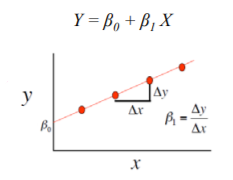

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x


Three major uses for __regression analysis__ are: 
- determining the __strength__ of predictors,
    - Typical questions are what is the strength of __relationship__ between _dose and effect_, _sales and marketing spending_, or _age and income_.
- __forecasting__ an effect, and
    - how much __additional sales income__ do I get for each additional $1000 spent on marketing?
- __trend__ forecasting.
    - what will the __price of house__ be in _6 months_?

<a id=section401></a>

### 4.1 Linear Regression Equation with Errors in consideration

While taking errors into consideration the equation of linear regression is: 
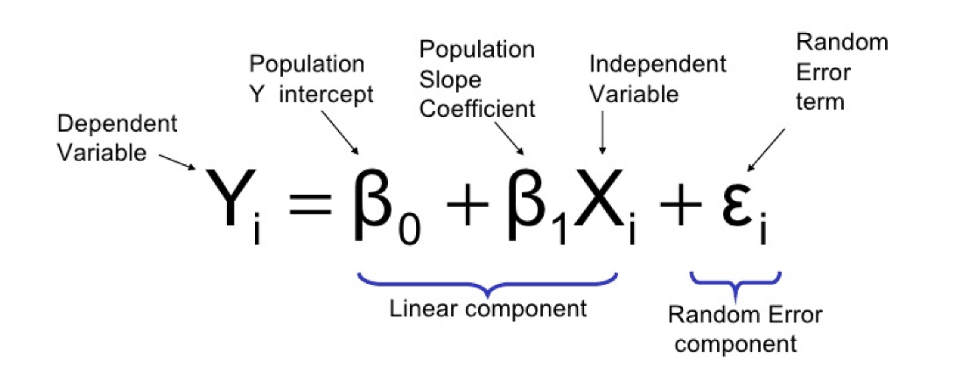
Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):


What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.
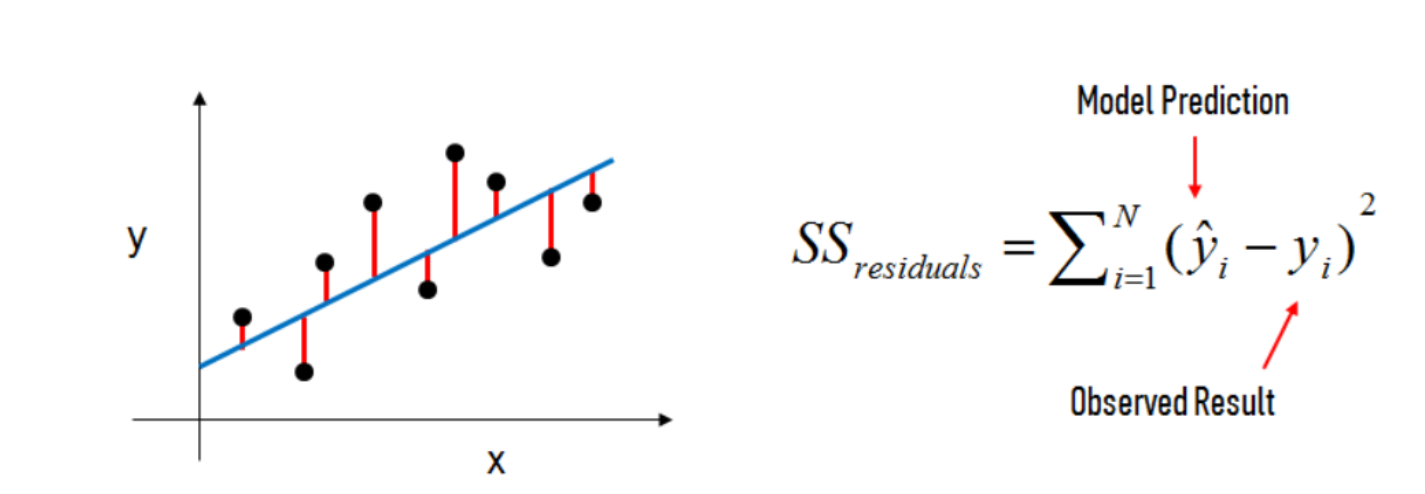


How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$ = 0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:
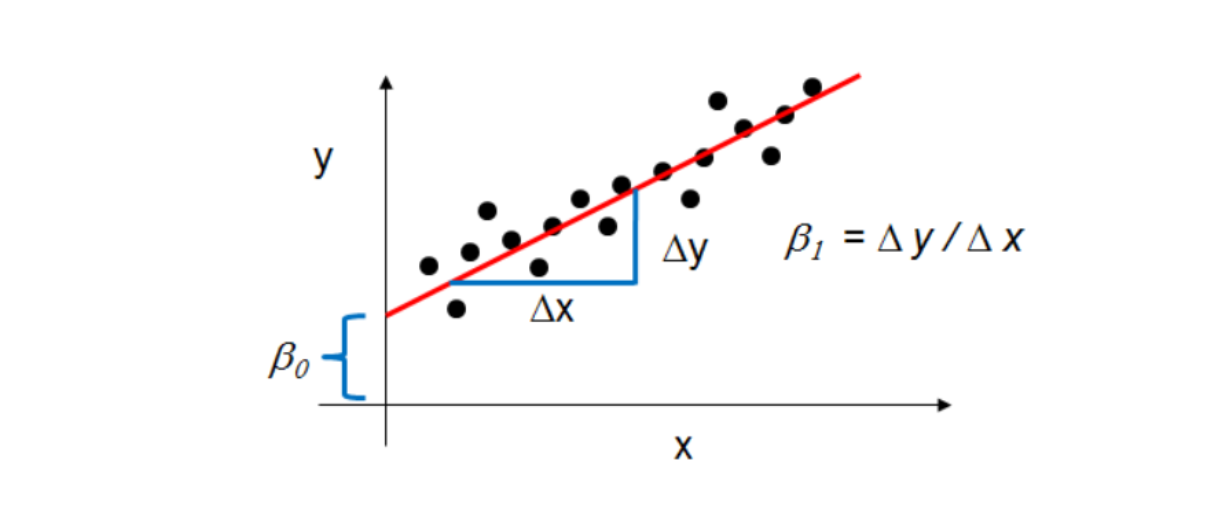

<a id = sectionassumptions></a>

#### 4.1.1 Assumptions of Linear Regression

1. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
2. There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
3. The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
4. The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
5. The error terms must be normally distributed.

<a id=section402></a>

### 4.2 Preparing X and y using pandas

- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

In [84]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Project_final_sc = sc.fit_transform(Project_final)

In [85]:
# Copy the dataset 

Project_final_sc = pd.DataFrame(Project_final_sc)
Project2 = Project_final_sc.copy()
Project2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.658506,0.539624,0.658963,1.061109,0.313159,0.741127,0.648281,-0.473766,0.793546,1.052959,0.880362,-0.952231,0.521228,0.438861,-0.129585
1,-0.068293,-0.380198,0.658963,-0.689001,0.313159,-0.770150,0.648281,0.504925,0.793546,0.158428,-0.428115,0.605965,-0.574433,0.438861,0.118848
2,0.658506,0.671287,0.658963,1.061109,0.313159,0.741127,0.648281,-0.319490,0.793546,0.986698,0.831900,0.605965,0.331164,0.438861,0.427653
3,0.658506,0.551993,0.658963,-0.689001,1.652119,0.741127,-0.921808,-0.714823,-1.025620,-1.862551,-0.718888,0.605965,-0.574433,0.438861,0.108680
4,1.385305,1.299759,2.162512,1.061109,1.652119,0.741127,0.648281,0.222888,0.793546,0.953567,0.734975,0.605965,1.382104,0.438861,0.889271


In [86]:
# Putting name of columns:

Project2.columns = ['OverallQual','GrLivArea','Neighborhood','ExterQual','GarageCars','KitchenQual','BsmtQual','TotalBsmtSF','FullBath','YearBuilt','YearRemodAdd','Fireplaces','MasVnrArea','MSZoning','LotArea']
Project2.head()

,OverallQual,GrLivArea,Neighborhood,ExterQual,GarageCars,KitchenQual,BsmtQual,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,MasVnrArea,MSZoning,LotArea
0,0.658506,0.539624,0.658963,1.061109,0.313159,0.741127,0.648281,-0.473766,0.793546,1.052959,0.880362,-0.952231,0.521228,0.438861,-0.129585
1,-0.068293,-0.380198,0.658963,-0.689001,0.313159,-0.770150,0.648281,0.504925,0.793546,0.158428,-0.428115,0.605965,-0.574433,0.438861,0.118848
2,0.658506,0.671287,0.658963,1.061109,0.313159,0.741127,0.648281,-0.319490,0.793546,0.986698,0.831900,0.605965,0.331164,0.438861,0.427653
3,0.658506,0.551993,0.658963,-0.689001,1.652119,0.741127,-0.921808,-0.714823,-1.025620,-1.862551,-0.718888,0.605965,-0.574433,0.438861,0.108680
4,1.385305,1.299759,2.162512,1.061109,1.652119,0.741127,0.648281,0.222888,0.793546,0.953567,0.734975,0.605965,1.382104,0.438861,0.889271


In [87]:
feature_cols = ['OverallQual','GrLivArea_Log','NbHd_num','ExtQ_num','GarageCars','KiQ_num','BsQ_num','TotalBsmtSF','FullBath','YearBuilt','YearRemodAdd','Fireplaces','MasVnrArea','MSZ_num','LotArea_Log']                # create a Python list of feature names
X = Project[feature_cols]                                                                                                                                                                                                  # use the list to select a subset of the original DataFrame-+

- Checking the type and shape of X.

In [83]:
print(type(X))
print(X.shape)


<class 'pandas.core.frame.DataFrame'>
(1458, 15)


In [88]:
y = Project.SalePrices
y.head(10)

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
5    11.870600
6    12.634603
7    12.206073
8    11.774520
9    11.678440
Name: SalePrices, dtype: float64

- Check the type and shape of y

In [89]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1458,)


<a id=section403></a>

### 4.3 Splitting X and y into training and test datasets.

In [90]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=5)

In [91]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (1166, 15)
y_train shape:  (1166,)

Test cases as below
X_test shape:  (292, 15)
y_test shape:  (292,)


<a id=section404></a>

### 4.4 Linear regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating Root mean square error 
The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))```

In [92]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

### Linear Regression Model without GridSearcCV
Note:  Linear Regression Model with GridSearcCV is implemented at Table of Contents: 8

In [93]:
X = Project[feature_cols] 
y = Project.SalePrices
linreg = linear_reg(X,y)

<a id=section405></a>

### 4.5 Interpreting Model Coefficients

In [94]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: 2.656464638708975
Coefficients: [ 6.59010773e-02  3.27034925e-01  4.81070347e-02  1.09099752e-02
  5.37713732e-02  4.65635401e-02  3.30153926e-02  1.34462913e-04
 -3.30130958e-02  6.07663478e-04  1.98764328e-03  5.40837120e-02
  5.70763963e-05  8.67137221e-02  7.77243116e-02]


Its hard to remember the order of the feature names, we so we are __zipping__ the features to pair the feature names with the coefficients

In [95]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)       

In [96]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 2.656464638708975
OverallQual 0.06590107727205506
GrLivArea_Log 0.3270349254917378
NbHd_num 0.0481070346606062
ExtQ_num 0.01090997515931062
GarageCars 0.053771373211195184
KiQ_num 0.046563540142016586
BsQ_num 0.033015392566267336
TotalBsmtSF 0.000134462913184472
FullBath -0.03301309576573251
YearBuilt 0.0006076634780998999
YearRemodAdd 0.0019876432751650963
Fireplaces 0.05408371203870107
MasVnrArea 5.707639634494853e-05
MSZ_num 0.08671372212857292
LotArea_Log 0.07772431155154035


__y = 2.13003 + 0.0665 `*` OverallQual + 0.3538 `*` GrLivArea + 0.0358 `*` Neighborhood + 0.0091 `*` ExterQual + 0.0554 `*` GarageCars + 0.0522 `*` KitchenQual + 0.0308 `*` BsmtQual + 0.0001 `*` TotalBsmtSF - 0.0384 `*` FullBath + 0.0006 `*` YearBuilt + 0.0020 `*` YearRemodAdd + 0.0446 `*` Fireplaces + 4.6764 `*` MasVnrArea + 0.0960 `*` MSZoning + 0.0790 `*` LotArea__

How do we interpret the OverallQual coefficient (_0.0665_)
- A "unit" increase in OverallQual is **associated with** a _"0.0665_ unit" increase in Saleprice.

Important Notes:
- This is a statement of __association__, not __causation__.
- If an increase in FullBath was associated with a __decrease__ in Saleprice,  β1  would be __negative.__

<a id=section406></a>

### 4.6 Using the Model for Prediction

In [97]:
y_pred_train = linreg.predict(X_train)  

In [98]:
y_pred_test = linreg.predict(X_test)                                                           # make predictions on the testing set

- We need an evaluation metric in order to compare our predictions with the actual values.

## Linear Regression

In [100]:
#Train the model

from sklearn import linear_model
model = linear_model.LinearRegression()

In [101]:
#Fit the model

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
#Score/Accuracy

print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  86.11995229203043


## DecisionTreeRegressor

In [103]:
#Train the model

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [104]:
#Fit

model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [105]:
#Score/Accuracy

print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  60.11215321352347


## RandomForestRegressor

In [106]:
#Train the model

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [107]:
#Fit

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [108]:
#Score/Accuracy

print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  83.24842077146408


- The Accuracy of all applied model is very similar, except for Linear Regression.

<a id=section5></a>

## 5. Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
For example, if a model predicts that the price of apple is Rs75/kg, but the actual price of apple is Rs100/kg, then the error in prediction will be Rs25/kg.<br/>
Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

<a id=section501></a>

### 5.1 Model Evaluation using __metrics.__

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Saleprice predictions

In [109]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [111]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.0974454057967545
MAE for test set is 0.10294564241774057


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Saleprice predictions

In [112]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [113]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.01751009568214941
MSE for test set is 0.02062550304953782


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Saleprice predictions

In [114]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [116]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.13232571814333527
RMSE for test set is 0.14361581754645908


Comparing these metrics:

- __MAE__ is the easiest to understand, because it's the __average error.__ 
- __MSE__ is more popular than MAE, because MSE "punishes" larger errors.
- __RMSE__ is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.

<a id=section502></a>

### 5.2 Model Evaluation using Rsquared value.

- There is one more method to evaluate linear regression model and that is by using the __Rsquared__ value.<br/>
- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

In [119]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8920456054555996 0.8906375046571944


In [120]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8611995229203043 0.8536560187311905


<a id=section6></a>

## 6. Feature Selection

At times some features do not contribute much to the accuracy of the model, in that case its better to discard those features.<br/> 
- Let's check whether __"FullBath", "MasVnrArea"__ improve the quality of our predictions or not.<br/> 
To check this we are going to take all the features other than "newspaper" and see if the error (RMSE) is reducing or not.
- Also Applying __gridsearch__ method for exhaustive search over specified parameter values of  estimator.

In [121]:
feature_cols = ['OverallQual','GrLivArea_Log','NbHd_num','ExtQ_num','GarageCars','KiQ_num','BsQ_num','TotalBsmtSF','YearBuilt','YearRemodAdd','Fireplaces','MSZ_num','LotArea_Log']                                                          # create a Python list of feature names
X = Project[feature_cols]  
y = Project.SalePrices
linreg=linear_reg(X,y,gridsearch=True)

Mean cross-validated score of the best_estimator :  0.8862643375539557
RMSE for the test set is 0.14419235729489566


- _Before_ doing feature selection _RMSE_ for the test dataset was __0.143615__.<br/>
- _After_ discarding 'FullBath', 'MasVnrArea' column, RMSE comes to be __0.144192__.<br/>
    - As you can see there is __no significant improvement__ in the quality, therefore, the 'FullBath', 'MasVnrArea' column shouldn't be discarded. But if in some other case if there is significant decrease in the RMSE, then you must discard that feature.
- Give a try to other __features__ and check the RMSE score for each one.

<a id=section7></a>
## 7. Conclusion

- The analysis helps us to understand what are the features are need to consider while selling the house.
- The main features are 'GrLivArea’, ‘GarageCars', 'TotalBsmtSF' and 'YearBuilt'.
- If main features are good then sell price increase.
- The other main features 'TotRmsAbvGrd', 'GarageArea', '1stFlrSF' and 'GarageYrBlt'.
- If other main features are good then sell price decrease.


<a id=section701></a>
### 7.1 Actionable Insights

- In order to **profit** the Saleprice ** more focus on these features 'GrLivArea’, ‘GarageCars', 'TotalBsmtSF' and 'YearBuilt'.
- In order to **profit** the Saleprice ** less focus on these features 'TotRmsAbvGrd', 'GarageArea', '1stFlrSF' and 'GarageYrBlt'. 